In [22]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

# Downloading Apple's stock data
apple_stock = yf.download('AAPL', start='2010-01-01', end='2023-07-01')

# Display the first few rows of the dataset
print("Initial dataset:")
print(apple_stock.head())

# Checking for missing values
print("\nChecking for missing values:")
print(apple_stock.isnull().sum())


[*********************100%%**********************]  1 of 1 completed

Initial dataset:
                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2010-01-04  7.622500  7.660714  7.585000  7.643214   6.461977  493729600
2010-01-05  7.664286  7.699643  7.616071  7.656429   6.473150  601904800
2010-01-06  7.656429  7.686786  7.526786  7.534643   6.370186  552160000
2010-01-07  7.562500  7.571429  7.466071  7.520714   6.358408  477131200
2010-01-08  7.510714  7.571429  7.466429  7.570714   6.400680  447610800

Checking for missing values:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


Part 2: Data Preprocessing

In [23]:
# Data preprocessing
data = apple_stock['Close'].values
data = data.reshape(-1, 1)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Splitting the data into training and testing sets
train_data_len = int(np.ceil(len(scaled_data) * 0.8))
train_data = scaled_data[0:train_data_len, :]
test_data = scaled_data[train_data_len - 60:, :]

# Creating training data set
x_train, y_train = [], []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Reshaping the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
Part 3: Creating and Training the LSTM Model

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Building the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

# Compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

# Creating testing data set
x_test, y_test = [], data[train_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Making predictions
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Preparing data for plotting
train = data[:train_data_len]
valid = data[train_data_len:]
valid = np.append(valid[:60], predictions)


C:\Users\ASUS\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2657/2657 ━━━━━━━━━━━━━━━━━━━━ 62s 21ms/step - loss: 0.0010
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


In [ ]:
Part 4: Histogram of Stock Prices

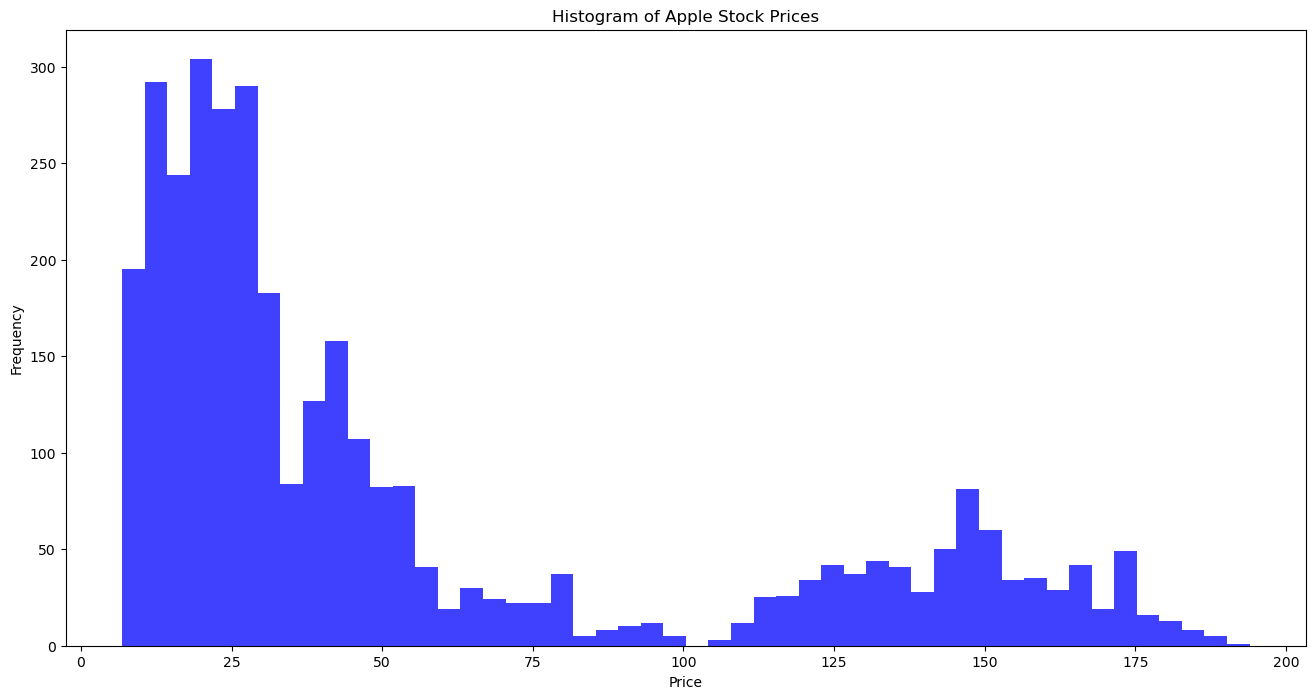

In [25]:
# Plot 1: Histogram of stock prices
plt.figure(figsize=(16, 8))
plt.hist(data, bins=50, alpha=0.75, color='blue')
plt.title('Histogram of Apple Stock Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [ ]:
Part 5: Line Graph of Stock Trends

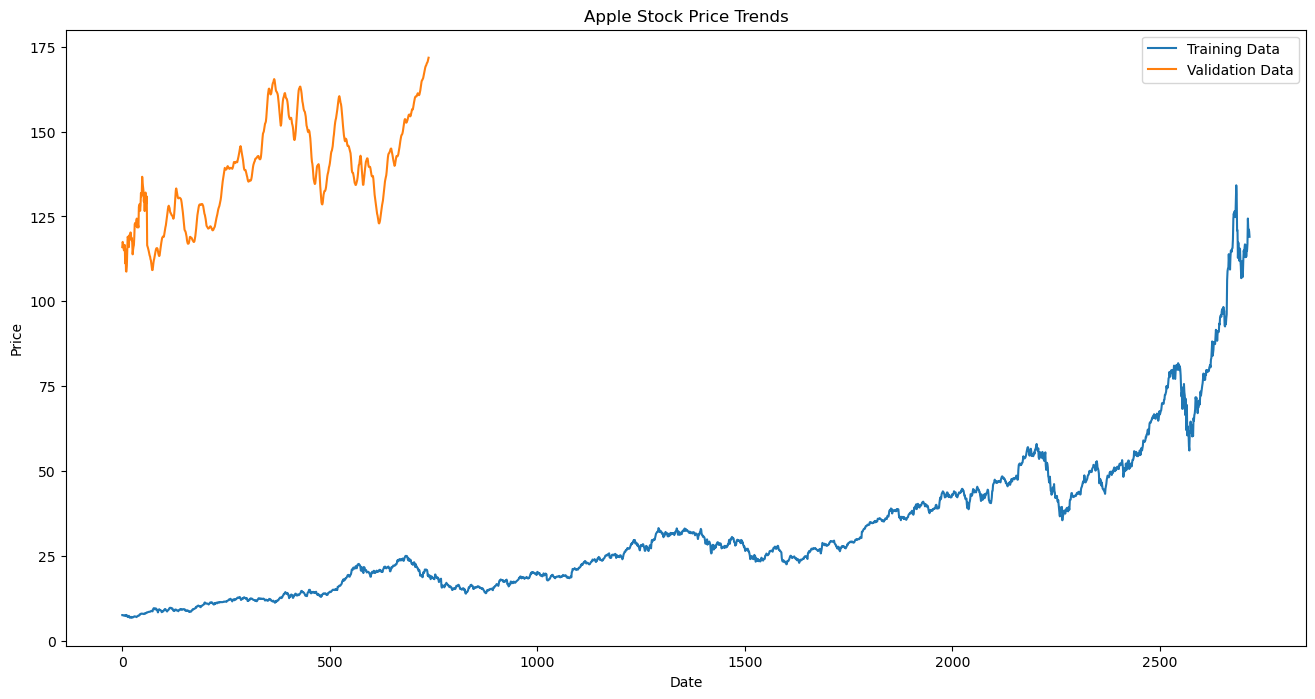

In [26]:
# Plot 2: Line graph of stock trends
plt.figure(figsize=(16, 8))
plt.plot(train, label='Training Data')
plt.plot(valid, label='Validation Data')
plt.title('Apple Stock Price Trends')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
Part 6: Line Graph of Stock Price Prediction

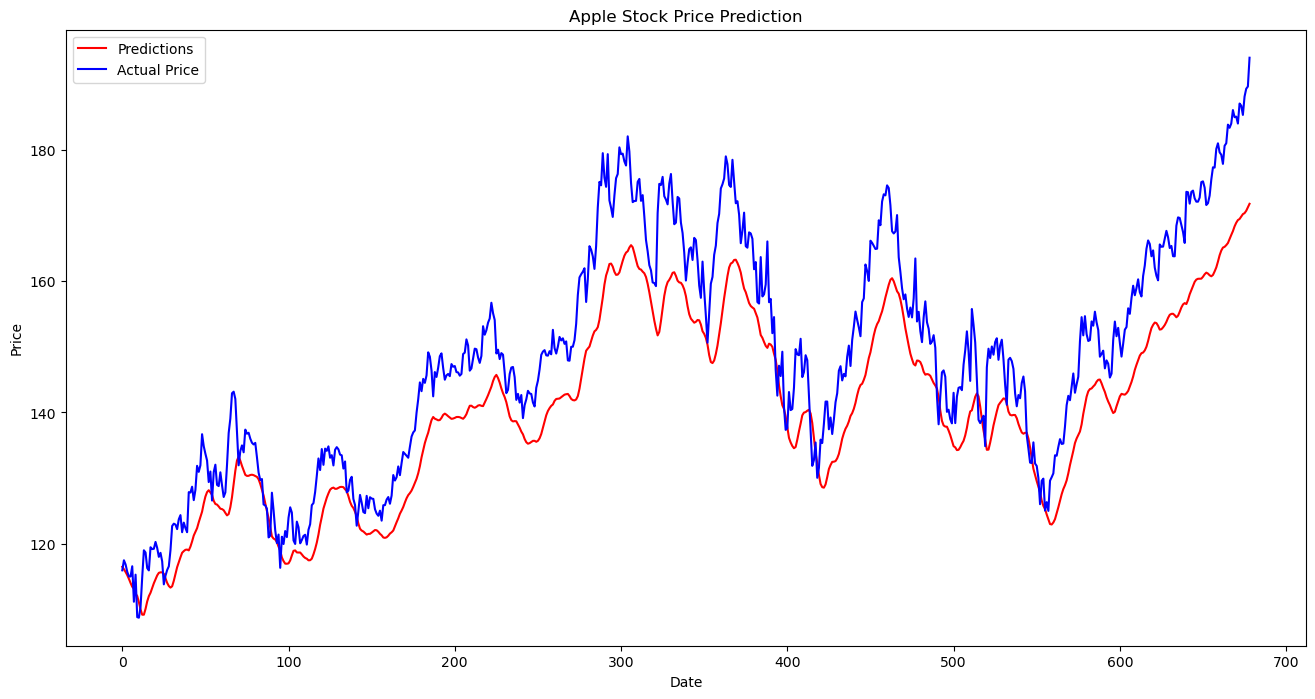

In [27]:
# Plot 3: Line graph of stock price prediction
plt.figure(figsize=(16, 8))
plt.plot(valid[60:], label='Predictions', color='red')
plt.plot(data[train_data_len:], label='Actual Price', color='blue')
plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()
